In [1]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
def cosseno(Amp,Fase,Np,Freq,Fs):
    incremento=1/Fs
    t = np.linspace(0, incremento*(Np-1), Np)
    y=Amp*np.cos(2*np.pi*Freq*t+(Fase*np.pi/180))
    return [y, t]

In [3]:
fs = 2e3
Fase = 0
Np = 5e3
percentual_de_corte = 0.1

[y, t] = cosseno(1000,Fase,Np,5,fs)
[y1, t] = cosseno(100,Fase,Np,5e2,fs)

yt = np.around(y + y1)

/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sinusoidal with white noise')

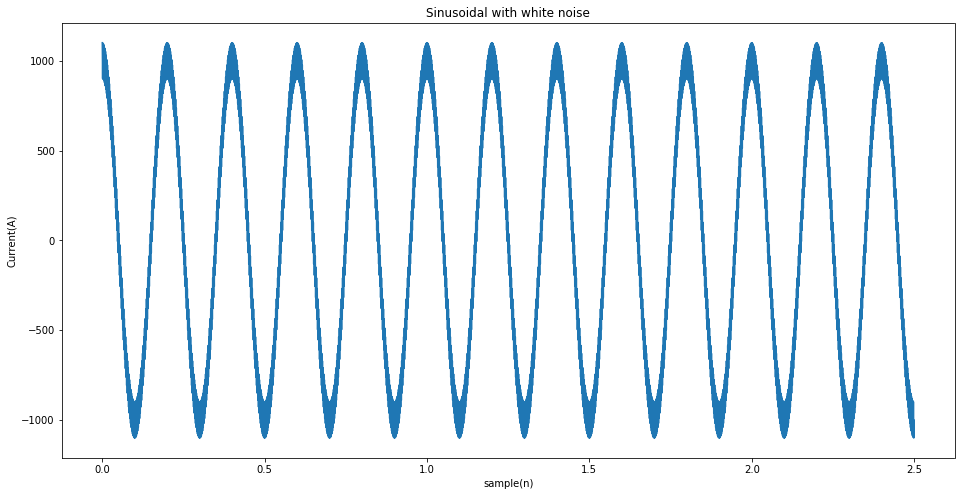

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(t, yt)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

In [11]:
wn = 10/(fs/2)
b, a = signal.butter(4, wn, btype='lowpass')
w, h = signal.freqz(b, a)
wnn, hnn = signal.freqz(b0n, a0n)

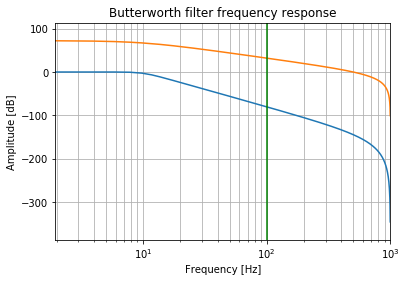

In [12]:
plt.plot(fs*w/(2*np.pi), 20 * np.log10(abs(h)))
plt.plot(fs*wnn/(2*np.pi), 20 * np.log10(abs(hnn)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [13]:
sos = signal.tf2sos(b, a)

In [14]:
b0 = sos[0][0:3]
b1 = sos[1][0:3]

a0 = sos[0][3:6]
a1 = sos[1][3:6]

In [15]:
vbit = 2**14
avmax = np.amax(np.abs(a0))
bvmax = np.amax(np.abs(b0))

a0n = np.asarray([vbit*(a0[0]/avmax), vbit*(a0[1]/avmax), vbit*(a0[2]/avmax)])

b0n = np.asarray([vbit*(b0[0]/bvmax), vbit*(b0[1]/bvmax), vbit*(b0[2]/bvmax)])

a1vmax = np.amax(np.abs(a1))
b1vmax = np.amax(np.abs(b1))

a1n = np.asarray([vbit*(a1[0]/a1vmax), vbit*(a1[1]/a1vmax), vbit*(a1[2]/a1vmax)])

b1n = np.asarray([vbit*(b1[0]/b1vmax), vbit*(b1[1]/b1vmax), vbit*(b1[2]/b1vmax)])

In [16]:
filtered = signal.filtfilt(b, a, yt)
filtered0 = signal.filtfilt(b0, a0, yt)
filtered1 = signal.filtfilt(b1, a1, filtered0)
sos_filtered = signal.sosfilt(sos, yt)

filtered0n = signal.filtfilt(b0n, a0n, yt)
filtered1n = signal.filtfilt(b1n, a1n, filtered0n)

Text(0.5, 1.0, 'Sinusoidal with white noise')

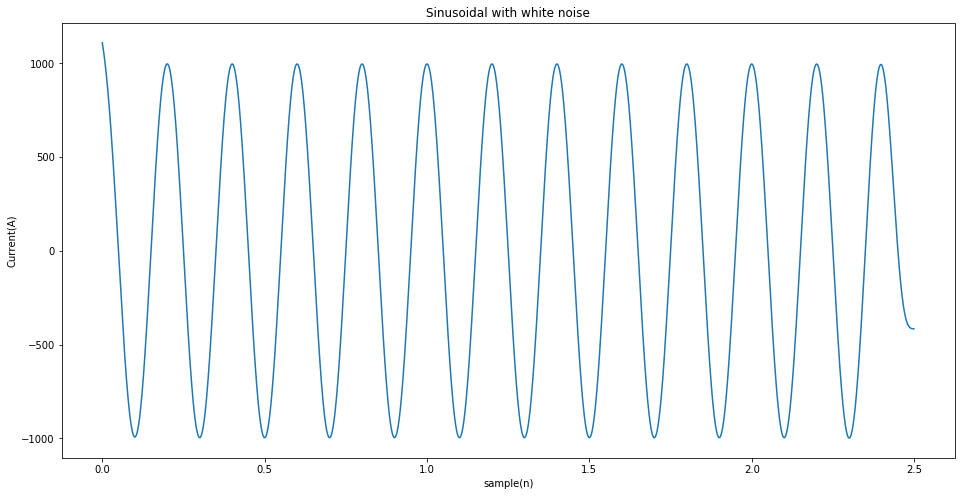

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(t, filtered)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

Text(0.5, 1.0, 'Sinusoidal with white noise')

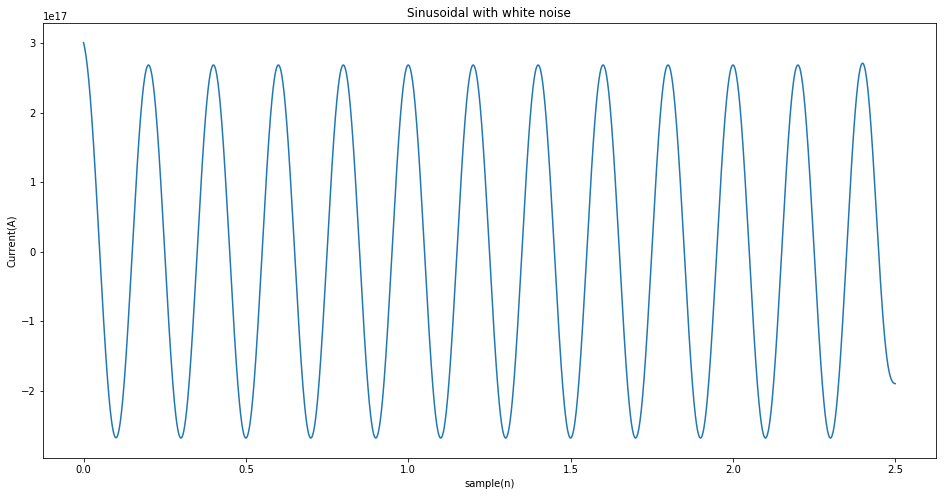

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
#ax.plot(t, filtered1)
ax.plot(t, filtered1n)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

Text(0.5, 1.0, 'Sinusoidal with white noise')

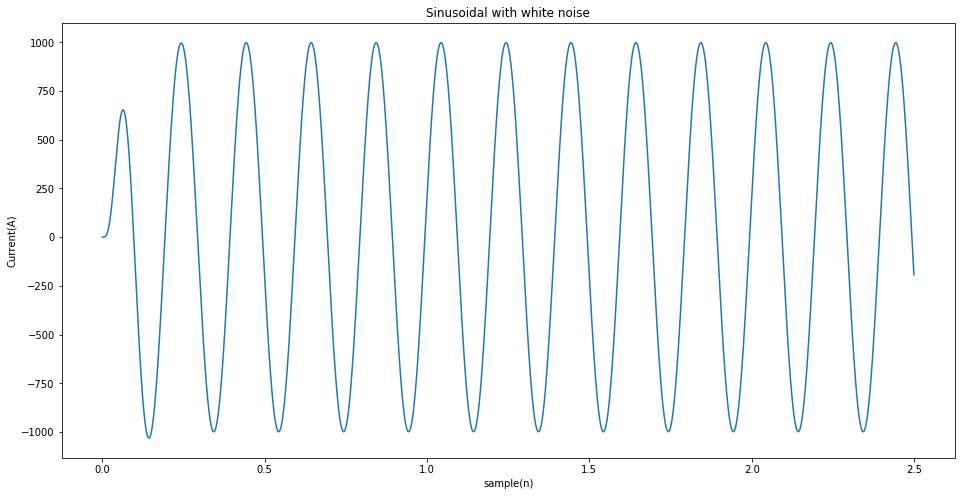

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(t, sos_filtered)
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

In [37]:
def vector2logisim(v,filename,nbits):
    fileID = open(filename,"w+")
    A="v2.0 raw"
    fileID.write(A + "\r\n")

    for i in range(len(v)):
        if (v[i]<0):
            
            if (nbits==8):
                A=hex(1+ ~(np.uint8(-v[i])))

            if (nbits==16):
                A=hex(1+ ~(np.uint16(-v[i])))
                    
            if (nbits==32):
                A=hex(1+ ~(np.uint32(-v[i])))
                
        else:
            if (nbits==32): 
                A = f"0x{v[i]:08x}"

            if (nbits==16): 
                A = f"0x{v[i]:04x}"

            if (nbits==8):
                A = f"0x{v[i]:02x}"
                
        
        fileID.write(A[2:] + '\r\n')
    fileID.write('90')
    fileID.close()

In [68]:
vector2logisim(np.int16(yt), "rom.txt", 16)

In [152]:
def logisim2vector(filename,nbits):
 
    df = pd.read_csv(filename, header=None)
    
    rom_list = []

    for i in range(1,len(df.values)):
        data_string = df.values[i][0].split(' ')
        
        for y in range(len(data_string)):
            
            num = int(data_string[y], nbits)
            if(num>=int('f000', 16)):
                num = num - 2**16
            rom_list.append(num)
            
    return rom_list

Text(0.5, 1.0, 'ROM out')

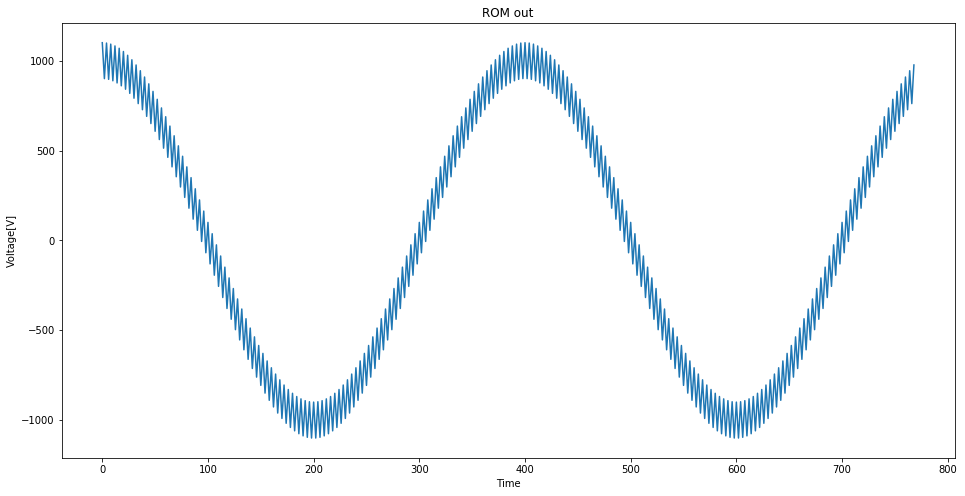

In [153]:
rom_out = logisim2vector('rom_out.txt', 16)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
ax.plot(rom_out)
ax.set_ylabel('Voltage[V]')
ax.set_xlabel('Time')
ax.set_title('ROM out')

In [25]:
vector2logisim([1, 2, 8, 16, 32], "enable.txt", 16)